In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('S2.CSV', sep=None, engine='python', encoding='utf-8-sig')

In [3]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6
1,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6
2,PHKD Mendis (SL),2022-2025,14,24,3,1316,182*,62.66,2063,63.79,5,5,NaN,137,24
3,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5
4,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11


In [4]:
df=df.rename(columns={'Mat':'matches played','Inns':'innings batted','NO':'not outs','Runs':'runs scored','HS':'highest inns score','Ave':'batting average','BF':'balls faced','SR':'batting strike rate','100':'hundreds scored','50':'fifties scored','0':'ducks scored','4s':'boundary fours','6s':'boundary sixes'})

In [5]:
df.head()

,Player,Span,matches played,innings batted,not outs,runs scored,highest inns score,batting average,balls faced,batting strike rate,hundreds scored,fifties scored,ducks scored,boundary fours,boundary sixes
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6
1,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6
2,PHKD Mendis (SL),2022-2025,14,24,3,1316,182*,62.66,2063,63.79,5,5,NaN,137,24
3,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5
4,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11


In [6]:
df.isnull().any()

Player                 False
Span                   False
matches played         False
innings batted         False
not outs               False
runs scored            False
highest inns score     False
batting average        False
balls faced             True
batting strike rate     True
hundreds scored        False
fifties scored         False
ducks scored            True
boundary fours         False
boundary sixes         False
dtype: bool

In [7]:
df['balls faced'] = pd.to_numeric(df['balls faced'], errors='coerce')
x = df['balls faced'].mean()

In [8]:
df['balls faced'].fillna(x,inplace=True)

In [10]:
df[df['balls faced'].isna()==1]

,Player,Span,matches played,innings batted,not outs,runs scored,highest inns score,batting average,balls faced,batting strike rate,hundreds scored,fifties scored,ducks scored,boundary fours,boundary sixes


In [11]:
df['batting strike rate'] = pd.to_numeric(df['batting strike rate'], errors='coerce')
y = df['batting strike rate'].mean()

In [12]:
df['ducks scored'] = pd.to_numeric(df['ducks scored'], errors='coerce')
z = df['ducks scored'].mean()

In [13]:
df['batting strike rate'].fillna(y,inplace=True)
df['ducks scored'].fillna(z,inplace=True)

In [14]:
df.isnull().any()

Player                 False
Span                   False
matches played         False
innings batted         False
not outs               False
runs scored            False
highest inns score     False
batting average        False
balls faced            False
batting strike rate    False
hundreds scored        False
fifties scored         False
ducks scored           False
boundary fours         False
boundary sixes         False
dtype: bool

In [15]:
df.duplicated()

0     False
1      True
2     False
3     False
4     False
      ...  
60    False
61    False
62    False
63    False
64    False
Length: 65, dtype: bool

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated()

0     False
2     False
3     False
4     False
5     False
      ...  
60    False
61    False
62    False
63    False
64    False
Length: 63, dtype: bool

In [18]:
df

,Player,Span,matches played,innings batted,not outs,runs scored,highest inns score,batting average,balls faced,batting strike rate,hundreds scored,fifties scored,ducks scored,boundary fours,boundary sixes
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,14884.266667,58.60,29,13,7.000000,626+,6
2,PHKD Mendis (SL),2022-2025,14,24,3,1316,182*,62.66,2063.000000,63.79,5,5,7.936508,137,24
3,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667.000000,55.68,5,4,2.000000,186,5
4,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,14884.266667,54.48,7,11,1.000000,246+,11
5,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,14884.266667,56.00,10,5,2.000000,104+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,15525.000000,59.67,27,38,11.000000,1165,24
61,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,14884.266667,44.77,7,6,1.000000,119+,0
62,SJ McCabe (AUS),1930-1938,39,62,5,2748,232,48.21,14884.266667,60.02,6,13,4.000000,241+,5+
63,Hashmatullah Shahidi (AFG),2018-2025,11,21,5,771,246,48.18,1629.000000,47.32,2,2,7.936508,87,1


In [19]:
df['Span'].str.split(pat='-')

0     [1928, 1948]
2     [2022, 2025]
3     [2015, 2016]
4     [1963, 1970]
5     [1930, 1954]
          ...     
60    [2002, 2014]
61    [1924, 1934]
62    [1930, 1938]
63    [2018, 2025]
64    [1928, 1934]
Name: Span, Length: 63, dtype: object

In [20]:
df['rookies year']=df['Span'].str.split(pat='-').str[0]

In [21]:
df['final year']=df['Span'].str.split(pat='-').str[1]

In [22]:
df

,Player,Span,matches played,innings batted,not outs,runs scored,highest inns score,batting average,balls faced,batting strike rate,hundreds scored,fifties scored,ducks scored,boundary fours,boundary sixes,rookies year,final year
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,14884.266667,58.60,29,13,7.000000,626+,6,1928,1948
2,PHKD Mendis (SL),2022-2025,14,24,3,1316,182*,62.66,2063.000000,63.79,5,5,7.936508,137,24,2022,2025
3,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667.000000,55.68,5,4,2.000000,186,5,2015,2016
4,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,14884.266667,54.48,7,11,1.000000,246+,11,1963,1970
5,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,14884.266667,56.00,10,5,2.000000,104+,1,1930,1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,15525.000000,59.67,27,38,11.000000,1165,24,2002,2014
61,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,14884.266667,44.77,7,6,1.000000,119+,0,1924,1934
62,SJ McCabe (AUS),1930-1938,39,62,5,2748,232,48.21,14884.266667,60.02,6,13,4.000000,241+,5+,1930,1938
63,Hashmatullah Shahidi (AFG),2018-2025,11,21,5,771,246,48.18,1629.000000,47.32,2,2,7.936508,87,1,2018,2025


In [23]:
df=df.drop(['Span'],axis=1)

In [24]:
df.head()

,Player,matches played,innings batted,not outs,runs scored,highest inns score,batting average,balls faced,batting strike rate,hundreds scored,fifties scored,ducks scored,boundary fours,boundary sixes,rookies year,final year
0,DG Bradman (AUS),52,80,10,6996,334,99.94,14884.266667,58.60,29,13,7.000000,626+,6,1928,1948
2,PHKD Mendis (SL),14,24,3,1316,182*,62.66,2063.000000,63.79,5,5,7.936508,137,24,2022,2025
3,AC Voges (AUS),20,31,7,1485,269*,61.87,2667.000000,55.68,5,4,2.000000,186,5,2015,2016
4,RG Pollock (SA),23,41,4,2256,274,60.97,14884.266667,54.48,7,11,1.000000,246+,11,1963,1970
5,GA Headley (WI),22,40,4,2190,270*,60.83,14884.266667,56.00,10,5,2.000000,104+,1,1930,1954


In [25]:
df['country']=df['Player'].str.split(pat='(').str[1]

In [26]:
df['country']

0        AUS)
2         SL)
3        AUS)
4         SA)
5         WI)
       ...   
60    ICC/SA)
61       AUS)
62       AUS)
63       AFG)
64       ENG)
Name: country, Length: 63, dtype: object

In [27]:
df['Player']=df['Player'].str.split(pat='(').str[0]

In [28]:
df

,Player,matches played,innings batted,not outs,runs scored,highest inns score,batting average,balls faced,batting strike rate,hundreds scored,fifties scored,ducks scored,boundary fours,boundary sixes,rookies year,final year,country
0,DG Bradman,52,80,10,6996,334,99.94,14884.266667,58.60,29,13,7.000000,626+,6,1928,1948,AUS)
2,PHKD Mendis,14,24,3,1316,182*,62.66,2063.000000,63.79,5,5,7.936508,137,24,2022,2025,SL)
3,AC Voges,20,31,7,1485,269*,61.87,2667.000000,55.68,5,4,2.000000,186,5,2015,2016,AUS)
4,RG Pollock,23,41,4,2256,274,60.97,14884.266667,54.48,7,11,1.000000,246+,11,1963,1970,SA)
5,GA Headley,22,40,4,2190,270*,60.83,14884.266667,56.00,10,5,2.000000,104+,1,1930,1954,WI)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,GC Smith,117,205,13,9265,277,48.25,15525.000000,59.67,27,38,11.000000,1165,24,2002,2014,ICC/SA)
61,WH Ponsford,29,48,4,2122,266,48.22,14884.266667,44.77,7,6,1.000000,119+,0,1924,1934,AUS)
62,SJ McCabe,39,62,5,2748,232,48.21,14884.266667,60.02,6,13,4.000000,241+,5+,1930,1938,AUS)
63,Hashmatullah Shahidi,11,21,5,771,246,48.18,1629.000000,47.32,2,2,7.936508,87,1,2018,2025,AFG)


In [29]:
df['country']=df['country'].str.split(pat=')').str[0]

In [30]:
df.head()

,Player,matches played,innings batted,not outs,runs scored,highest inns score,batting average,balls faced,batting strike rate,hundreds scored,fifties scored,ducks scored,boundary fours,boundary sixes,rookies year,final year,country
0,DG Bradman,52,80,10,6996,334,99.94,14884.266667,58.60,29,13,7.000000,626+,6,1928,1948,AUS
2,PHKD Mendis,14,24,3,1316,182*,62.66,2063.000000,63.79,5,5,7.936508,137,24,2022,2025,SL
3,AC Voges,20,31,7,1485,269*,61.87,2667.000000,55.68,5,4,2.000000,186,5,2015,2016,AUS
4,RG Pollock,23,41,4,2256,274,60.97,14884.266667,54.48,7,11,1.000000,246+,11,1963,1970,SA
5,GA Headley,22,40,4,2190,270*,60.83,14884.266667,56.00,10,5,2.000000,104+,1,1930,1954,WI


In [31]:
df.dtypes

Player                  object
matches played           int64
innings batted           int64
not outs                 int64
runs scored              int64
highest inns score      object
batting average        float64
balls faced            float64
batting strike rate    float64
hundreds scored          int64
fifties scored           int64
ducks scored           float64
boundary fours          object
boundary sixes          object
rookies year            object
final year              object
country                 object
dtype: object

In [32]:
df['balls faced']=df['balls faced'].astype('int')

In [33]:
df['rookies year']=df['rookies year'].astype('int')

In [34]:
df['final year']=df['final year'].astype('int')

In [35]:
df.dtypes

Player                  object
matches played           int64
innings batted           int64
not outs                 int64
runs scored              int64
highest inns score      object
batting average        float64
balls faced              int64
batting strike rate    float64
hundreds scored          int64
fifties scored           int64
ducks scored           float64
boundary fours          object
boundary sixes          object
rookies year             int64
final year               int64
country                 object
dtype: object

In [36]:
df['highest inns score']=df['highest inns score'].str.split(pat=('*')).str[0]

In [37]:
df.head()

,Player,matches played,innings batted,not outs,runs scored,highest inns score,batting average,balls faced,batting strike rate,hundreds scored,fifties scored,ducks scored,boundary fours,boundary sixes,rookies year,final year,country
0,DG Bradman,52,80,10,6996,334,99.94,14884,58.60,29,13,7.000000,626+,6,1928,1948,AUS
2,PHKD Mendis,14,24,3,1316,182,62.66,2063,63.79,5,5,7.936508,137,24,2022,2025,SL
3,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2.000000,186,5,2015,2016,AUS
4,RG Pollock,23,41,4,2256,274,60.97,14884,54.48,7,11,1.000000,246+,11,1963,1970,SA
5,GA Headley,22,40,4,2190,270,60.83,14884,56.00,10,5,2.000000,104+,1,1930,1954,WI


In [38]:
df['length']=df['final year']-df['rookies year']

In [39]:
df

,Player,matches played,innings batted,not outs,runs scored,highest inns score,batting average,balls faced,batting strike rate,hundreds scored,fifties scored,ducks scored,boundary fours,boundary sixes,rookies year,final year,country,length
0,DG Bradman,52,80,10,6996,334,99.94,14884,58.60,29,13,7.000000,626+,6,1928,1948,AUS,20
2,PHKD Mendis,14,24,3,1316,182,62.66,2063,63.79,5,5,7.936508,137,24,2022,2025,SL,3
3,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2.000000,186,5,2015,2016,AUS,1
4,RG Pollock,23,41,4,2256,274,60.97,14884,54.48,7,11,1.000000,246+,11,1963,1970,SA,7
5,GA Headley,22,40,4,2190,270,60.83,14884,56.00,10,5,2.000000,104+,1,1930,1954,WI,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,GC Smith,117,205,13,9265,277,48.25,15525,59.67,27,38,11.000000,1165,24,2002,2014,ICC/SA,12
61,WH Ponsford,29,48,4,2122,266,48.22,14884,44.77,7,6,1.000000,119+,0,1924,1934,AUS,10
62,SJ McCabe,39,62,5,2748,232,48.21,14884,60.02,6,13,4.000000,241+,5+,1930,1938,AUS,8
63,Hashmatullah Shahidi,11,21,5,771,246,48.18,1629,47.32,2,2,7.936508,87,1,2018,2025,AFG,7


In [42]:
df[df['rookies year']<1960]['Player'].count()

np.int64(23)

In [43]:
df[df['length']<10]['matches played'].mean()

np.float64(24.5625)

In [44]:
df.groupby('country')['runs scored'].mean()

country
AFG          771.000000
AUS         6863.733333
ENG         4619.461538
ICC/IND    10937.000000
ICC/PAK     8830.000000
ICC/SA     11277.000000
ICC/WI     11953.000000
IND         7409.500000
NZ          9461.000000
PAK         6910.250000
SA          3824.200000
SL          7290.800000
WI          5505.375000
ZIM         4794.000000
Name: runs scored, dtype: float64

Matplotlib is building the font cache; this may take a moment.


<Axes: >

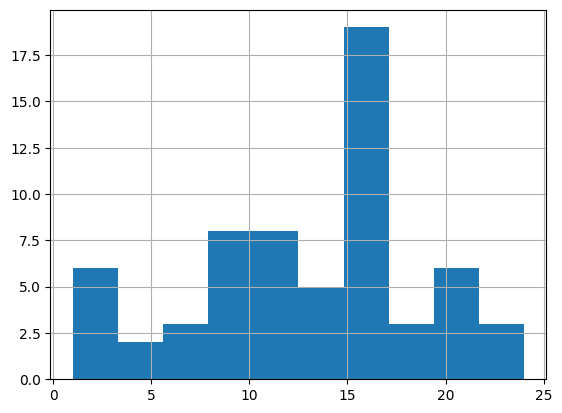

In [45]:
df['length'].hist()

<Axes: xlabel='country'>

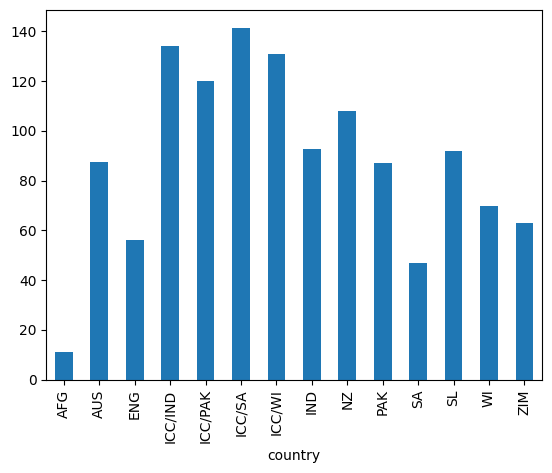

In [46]:
df.groupby('country')['matches played'].mean().plot(kind='bar')

In [47]:
df.sort_values(by='batting average', ascending=False).head(10)

,Player,matches played,innings batted,not outs,runs scored,highest inns score,batting average,balls faced,batting strike rate,hundreds scored,fifties scored,ducks scored,boundary fours,boundary sixes,rookies year,final year,country,length
0,DG Bradman,52,80,10,6996,334,99.94,14884,58.600000,29,13,7.000000,626+,6,1928,1948,AUS,20
2,PHKD Mendis,14,24,3,1316,182,62.66,2063,63.790000,5,5,7.936508,137,24,2022,2025,SL,3
3,AC Voges,20,31,7,1485,269,61.87,2667,55.680000,5,4,2.000000,186,5,2015,2016,AUS,1
4,RG Pollock,23,41,4,2256,274,60.97,14884,54.480000,7,11,1.000000,246+,11,1963,1970,SA,7
5,GA Headley,22,40,4,2190,270,60.83,14884,56.000000,10,5,2.000000,104+,1,1930,1954,WI,24
6,H Sutcliffe,54,84,9,4555,194,60.73,14884,34.590000,16,23,2.000000,202+,6,1924,1935,ENG,11
8,E Paynter,20,31,5,1540,243,59.23,14884,45.880000,4,7,3.000000,125+,4,1931,1939,ENG,8
9,KF Barrington,82,131,15,6806,256,58.67,14884,42.420000,20,35,5.000000,591+,27,1955,1968,ENG,13
10,ED Weekes,48,81,5,4455,207,58.61,14884,49.945484,15,19,6.000000,258+,2,1948,1958,WI,10
11,WR Hammond,85,140,16,7249,336,58.45,14884,38.070000,22,24,4.000000,419+,27,1927,1947,ENG,20


In [48]:
pd.pivot_table(
    df,
    values='runs scored',
    index='country',
    aggfunc='mean')

,runs scored
country,
AFG,771.000000
AUS,6863.733333
ENG,4619.461538
ICC/IND,10937.000000
ICC/PAK,8830.000000
ICC/SA,11277.000000
ICC/WI,11953.000000
IND,7409.500000
NZ,9461.000000


<Axes: >

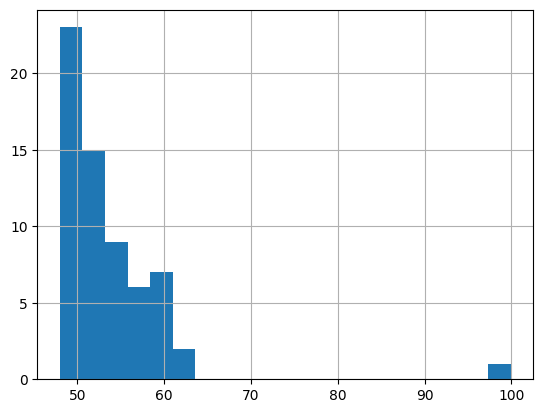

In [50]:
df['batting average'].hist(bins=20)

<Axes: xlabel='country'>

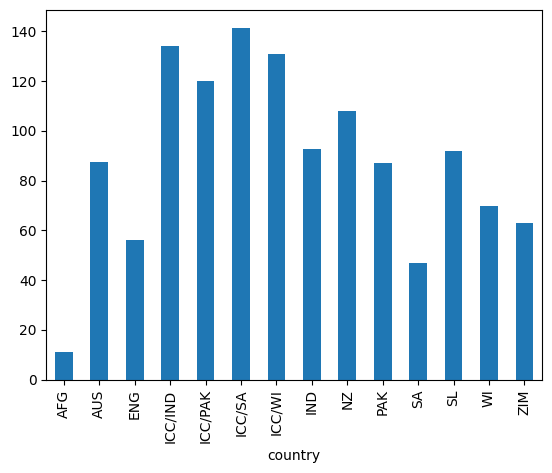

In [51]:
df.groupby('country')['matches played'].mean().plot(kind='bar')

<Axes: xlabel='balls faced', ylabel='runs scored'>

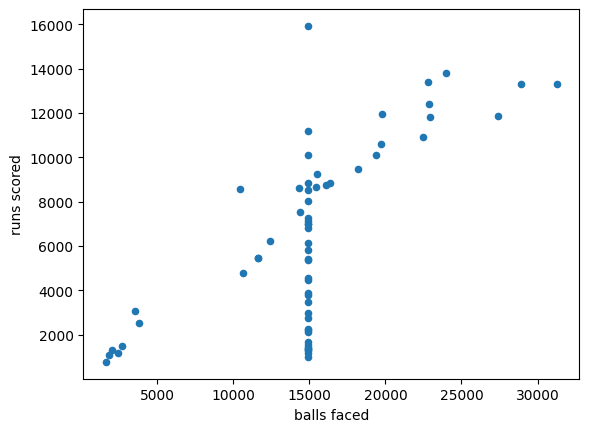

In [52]:
df.plot.scatter(x='balls faced', y='runs scored')

In [53]:
df.groupby('country')['runs scored'].mean()

country
AFG          771.000000
AUS         6863.733333
ENG         4619.461538
ICC/IND    10937.000000
ICC/PAK     8830.000000
ICC/SA     11277.000000
ICC/WI     11953.000000
IND         7409.500000
NZ          9461.000000
PAK         6910.250000
SA          3824.200000
SL          7290.800000
WI          5505.375000
ZIM         4794.000000
Name: runs scored, dtype: float64

In [54]:
df.sort_values(by='batting average', ascending=False).head(10)

,Player,matches played,innings batted,not outs,runs scored,highest inns score,batting average,balls faced,batting strike rate,hundreds scored,fifties scored,ducks scored,boundary fours,boundary sixes,rookies year,final year,country,length
0,DG Bradman,52,80,10,6996,334,99.94,14884,58.600000,29,13,7.000000,626+,6,1928,1948,AUS,20
2,PHKD Mendis,14,24,3,1316,182,62.66,2063,63.790000,5,5,7.936508,137,24,2022,2025,SL,3
3,AC Voges,20,31,7,1485,269,61.87,2667,55.680000,5,4,2.000000,186,5,2015,2016,AUS,1
4,RG Pollock,23,41,4,2256,274,60.97,14884,54.480000,7,11,1.000000,246+,11,1963,1970,SA,7
5,GA Headley,22,40,4,2190,270,60.83,14884,56.000000,10,5,2.000000,104+,1,1930,1954,WI,24
6,H Sutcliffe,54,84,9,4555,194,60.73,14884,34.590000,16,23,2.000000,202+,6,1924,1935,ENG,11
8,E Paynter,20,31,5,1540,243,59.23,14884,45.880000,4,7,3.000000,125+,4,1931,1939,ENG,8
9,KF Barrington,82,131,15,6806,256,58.67,14884,42.420000,20,35,5.000000,591+,27,1955,1968,ENG,13
10,ED Weekes,48,81,5,4455,207,58.61,14884,49.945484,15,19,6.000000,258+,2,1948,1958,WI,10
11,WR Hammond,85,140,16,7249,336,58.45,14884,38.070000,22,24,4.000000,419+,27,1927,1947,ENG,20


In [55]:
df[['matches played', 'runs scored', 'batting average']].describe()

,matches played,runs scored,batting average
count,63.000000,63.000000,63.000000
mean,79.238095,6351.476190,53.569206
std,51.765823,4106.698406,7.175262
min,11.000000,771.000000,48.000000
25%,28.500000,2383.500000,49.355000
50%,79.000000,6149.000000,51.620000
75%,119.000000,9048.500000,55.610000
max,200.000000,15921.000000,99.940000


In [56]:
df[(df['matches played'] > 50) & (df['batting average'] > 40)]

,Player,matches played,innings batted,not outs,runs scored,highest inns score,batting average,balls faced,batting strike rate,hundreds scored,fifties scored,ducks scored,boundary fours,boundary sixes,rookies year,final year,country,length
0,DG Bradman,52,80,10,6996,334,99.94,14884,58.60,29,13,7.0,626+,6,1928,1948,AUS,20
6,H Sutcliffe,54,84,9,4555,194,60.73,14884,34.59,16,23,2.0,202+,6,1924,1935,ENG,11
9,KF Barrington,82,131,15,6806,256,58.67,14884,42.42,20,35,5.0,591+,27,1955,1968,ENG,13
11,WR Hammond,85,140,16,7249,336,58.45,14884,38.07,22,24,4.0,419+,27,1927,1947,ENG,20
12,GS Sobers,93,160,21,8032,365,57.78,14884,53.58,26,30,12.0,593+,32+,1954,1974,WI,20
13,KC Sangakkara,134,233,17,12400,319,57.40,22882,54.19,38,52,11.0,1491,51,2000,2015,SL,15
14,JB Hobbs,61,102,7,5410,211,56.94,14884,46.22,15,28,4.0,276+,8,1908,1930,ENG,22
16,L Hutton,79,138,15,6971,364,56.67,14884,39.34,19,33,5.0,358+,7,1937,1955,ENG,18
17,SPD Smith,122,218,28,10613,239,55.85,19734,53.78,36,44,11.0,1155,66,2010,2025,AUS,15
18,JH Kallis,166,280,40,13289,224,55.37,28903,45.97,45,58,16.0,1488,97,1995,2013,ICC/SA,18


In [58]:
df[['runs scored', 'balls faced', 'batting average']].corr()

,runs scored,balls faced,batting average
runs scored,1.000000,0.682062,-0.031549
balls faced,0.682062,1.000000,-0.033138
batting average,-0.031549,-0.033138,1.000000


In [57]:
summary = df.groupby('country')['runs scored'].mean()
summary.to_csv('country_summary.csv')